## Introduction 
The aim of analysisng this dataset is to show the distribution of the following questions below

In [2]:
import pandas as pd
# converting the float columns to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./house_pricing_dataset.csv')

## Making a Copy of The Dataset
I would be working with this copy through while the original dataframe would be for referencing when needed.

In [4]:
#making a copy
df_housing = df.copy()

In [5]:
df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
#checking the info of the data
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
#describtion of the datset
df_housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [8]:
#the unique value count of each variable 
df_housing.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [9]:
#confirming if there are any null values
df_housing.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
#the shape of the dataset
df_housing.shape

(4600, 18)

### Data Wrangling
This is to remove any inconsistencies, irregularities and to ensure that the data is of high relevance.

1. Converting the date in the dataset into python datetime: This is to enable us do further analysis relating to a particular period within the data set.

2. Categorising the price column to price ranges: This is to perform analysis based on price ranges

3. Converting bedroom and bathroom values to intergers: The number of these parameters is needed in float for analysis 


In [11]:
#converting to python datetime
df_housing['date_time'] = pd.to_datetime(df_housing['date'])
df_housing['date_time']

0      2014-05-02
1      2014-05-02
2      2014-05-02
3      2014-05-02
4      2014-05-02
          ...    
4595   2014-07-09
4596   2014-07-09
4597   2014-07-09
4598   2014-07-10
4599   2014-07-10
Name: date_time, Length: 4600, dtype: datetime64[ns]

In [12]:
#extraction analysis date 
df_housing['date_time'] = pd.to_datetime(df_housing.date_time).dt.strftime('%Y-%m-%d')
df_housing['new_date'] = pd.to_datetime(df_housing.date_time).dt.day
df_housing['new_month'] = pd.to_datetime(df_housing.date_time).dt.month
df_housing.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,date_time,new_date,new_month
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014-05-02,2,5
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014-05-02,2,5


In [13]:
#converting the date to string type for further analysis
df_housing['date'] = df_housing['date'].astype(str)

In [14]:
#categorising price to different price ranges
import numpy as np
bins = [-1, 200000, 400000, 600000, 800000, 1000000, np.inf]
names = ['<200000','200000-400000','400000-600000','600000-800000','800000-1000000','1000000+']

#grouping price into different price groups 
df_housing['price_range'] = pd.cut(df_housing['price'], bins, labels=names)
df_housing.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,date_time,new_date,new_month,price_range
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014-05-02,2,5,200000-400000
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014-05-02,2,5,1000000+


In [15]:
#to check the significant count of each price range
df_housing['price_range'].value_counts()

200000-400000     1567
400000-600000     1417
600000-800000      718
1000000+           340
800000-1000000     320
<200000            238
Name: price_range, dtype: int64

In [16]:
#confirming if the price ranges has any null values
print(df_housing['price_range'].isnull().sum())

0


In [17]:
#showing the unioque price ranges 
df_housing['price_range'].unique()

['200000-400000', '1000000+', '400000-600000', '600000-800000', '800000-1000000', '<200000']
Categories (6, object): ['<200000' < '200000-400000' < '400000-600000' < '600000-800000' < '800000-1000000' < '1000000+']

In [18]:
#converting the bedroom and bathroom values from float to interger as ths would be require for further analysis
df_housing['bedrooms']= df_housing['bedrooms'].astype(int)
df_housing['bathrooms'] = df_housing['bathrooms'].astype(int)

## Explonatory Data Analysis

### <span style='color:blue'> Question 1. The distribution of house prices.</span>

In [19]:
import matplotlib.pyplot as plt

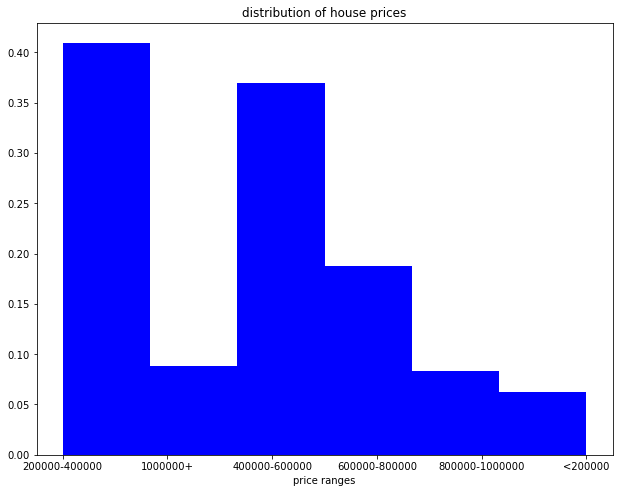

In [20]:
# plt.hist(df_housing['price_range'], density=True, color='blue',  bins=5, grid=False, figsize=(10, 4),legend=True)
# plt.show()
fig=plt.figure(figsize=(8,6))
his=fig.add_axes([0,0,1,1])
plt.hist(df_housing['price_range'], density=True, color='blue',  bins=6)
plt.title('distribution of house prices')
plt.xlabel('price ranges')
plt.show()

##### From the chart above, house price from 800,000 and above has the least distribution count while house price between 200,000 and 400,000 has the highest distibution count. 
This distribution shows that higher percentage of people can buy affordable houses.

### <span style='color:blue'> Question 2. The distribution of average house prices across the top 10 cities</span>

In [41]:
#to get the avg mean prices of countries in descending order 
df = df_housing.groupby('city')['price'].mean()
df1= df.sort_values(ascending=False)
df_avgprices_cities= df1.head(10)
df_avgprices_cities

city
Medina               2046559.09
Clyde Hill           1321945.45
Yarrow Point         1194837.50
Mercer Island        1123817.62
Bellevue              847180.66
Beaux Arts Village    745000.00
Fall City             692681.82
Sammamish             686917.58
Redmond               667649.53
Newcastle             666046.70
Name: price, dtype: float64

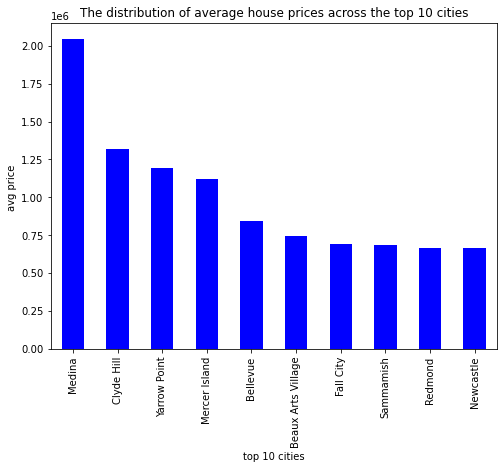

In [42]:
#plotting the distribution graph
fig = plt.figure(figsize=(8,6))
df_avgprices_cities_plot= df_avgprices_cities.plot(kind = 'bar', color='blue')
df_avgprices_cities_plot.set_ylabel('avg price ')
plt.title('The distribution of average house prices across the top 10 cities')
plt.xlabel('top 10 cities')
plt.show()

###### This chart shows that Medina City has the highest average houses prices while Newcastle has the least average house prices.

### <span style='color:blue'> Question 3. The trend of house prices from the earliest date to the latest date in the dataset.</span>

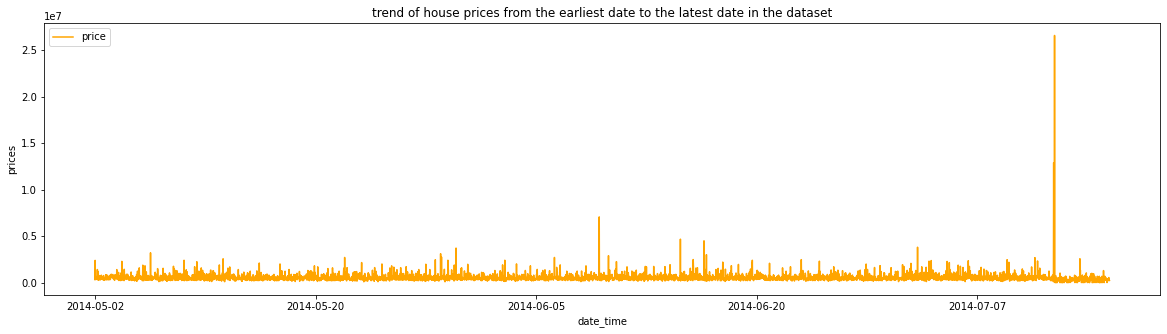

In [43]:
#using the line chart to get the trend analysis
df_housing.plot(x='date_time', y= 'price',color='orange', figsize = (20,5))
plt.legend(loc = 'upper left')
plt.title('trend of house prices from the earliest date to the latest date in the dataset')
plt.xlabel("date_time")
plt.ylabel("prices")
plt.show()

###### The chart above shows that houses prices increases greatly towards the end of 7th month in 2014 and then declines 

### <span style='color:blue'> Question 4. The distribution of maximum bedroom size across the top 10 cities.</span>

In [44]:
#using the maximum function to get the maximum bedroom size in descending order by city
df = df_housing.groupby('city')['bedrooms'].max()
df1= df.sort_values(ascending=False)
df_maxb_cities= df1.head(10)
df_maxb_cities

city
Seattle             9
Shoreline           8
Renton              7
Auburn              7
Lake Forest Park    7
Issaquah            7
Redmond             7
Mercer Island       7
Bellevue            7
Snoqualmie          6
Name: bedrooms, dtype: int64

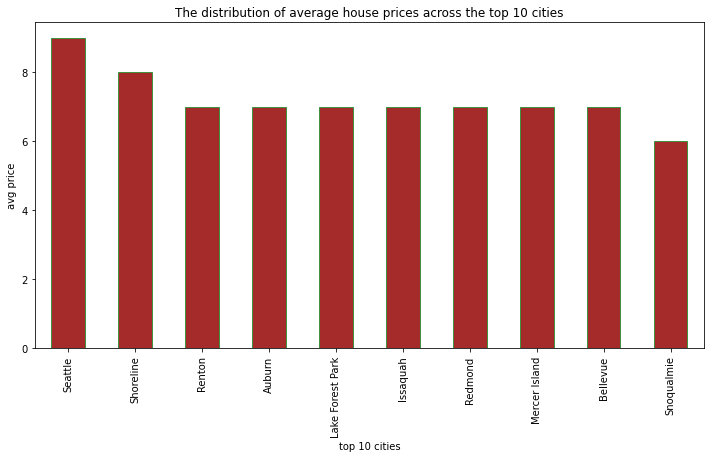

In [45]:
#plotting the chart 
fig = plt.figure(figsize=(12,6))
df_maxb_cities_plot= df_maxb_cities.plot(kind = 'bar',color="brown", edgecolor="#409240", linewidth=1)
df_maxb_cities_plot.set_ylabel('avg price')
plt.title('The distribution of average house prices across the top 10 cities')
plt.xlabel('top 10 cities')
plt.show()

###### Here, Seattle has the maximum number of bedroom sizes

### <span style='color:blue'> Question 5. The distribution of oldest houses across top 10 cities.</span>

In [46]:
#to categorise the oldest house based on my opinion, 
oldest_houses = df_housing.loc[df_housing['yr_built']< 2000]

#group these oldest houses by their cities
df = oldest_houses.groupby('city')['yr_built'].count()
df1= df.sort_values(ascending=False)
df2= df1.head(10)
df2


city
Seattle        1253
Bellevue        252
Renton          205
Kent            157
Redmond         152
Kirkland        148
Auburn          141
Federal Way     138
Sammamish       121
Shoreline       115
Name: yr_built, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

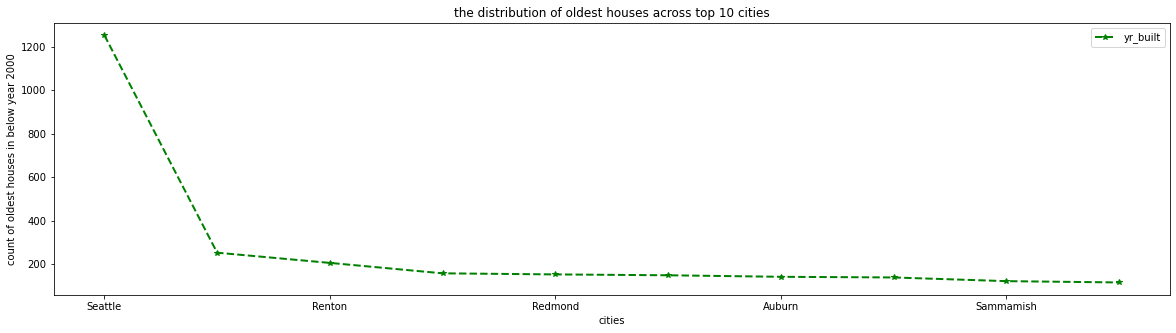

In [47]:
#plotting the chart
df2.plot(x='city', y= 'yr_built',color='green', figsize = (20,5), marker = '*', linestyle = '--', linewidth = 2)
plt.legend(loc = 'upper right')
plt.title('the distribution of oldest houses across top 10 cities')
plt.xlabel("cities")
plt.ylabel("count of oldest houses in below year 2000")
plt.show

###### Here, I picked houses built less than the year 2000 as the oldest houses in my opinion. Seattle has the highest count of the oldest houses below the year 2000

### <span style='color:blue'> Question 6. The distribution of the years the houses were last renovated.</span>

In [48]:
#houses with yr_renovated= 0 would be dropped, this assumes these houses were not renovated and hence not neeed in this dataset
houses_renovated = df_housing.loc[df_housing['yr_renovated']!=0].reset_index()
houses_renovated.head()


,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,street,city,statezip,country,date_time,new_date,new_month,price_range
0,0,2014-05-02 00:00:00,313000.00,3,1,1340,7912,1.50,0,0,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014-05-02,2,5,200000-400000
1,4,2014-05-02 00:00:00,550000.00,4,2,1940,10500,1.00,0,0,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014-05-02,2,5,400000-600000
2,5,2014-05-02 00:00:00,490000.00,2,1,880,6380,1.00,0,0,...,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014-05-02,2,5,400000-600000
3,9,2014-05-02 00:00:00,640000.00,4,2,1520,6200,1.50,0,0,...,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,2014-05-02,2,5,600000-800000
4,10,2014-05-02 00:00:00,463000.00,3,1,1710,7320,1.00,0,0,...,1948,1994,Burke-Gilman Trail,Lake Forest Park,WA 98155,USA,2014-05-02,2,5,400000-600000


In [49]:
df3 = houses_renovated.groupby('yr_renovated')['country'].count()
df_renovated_years =df3.sort_values(ascending=False)

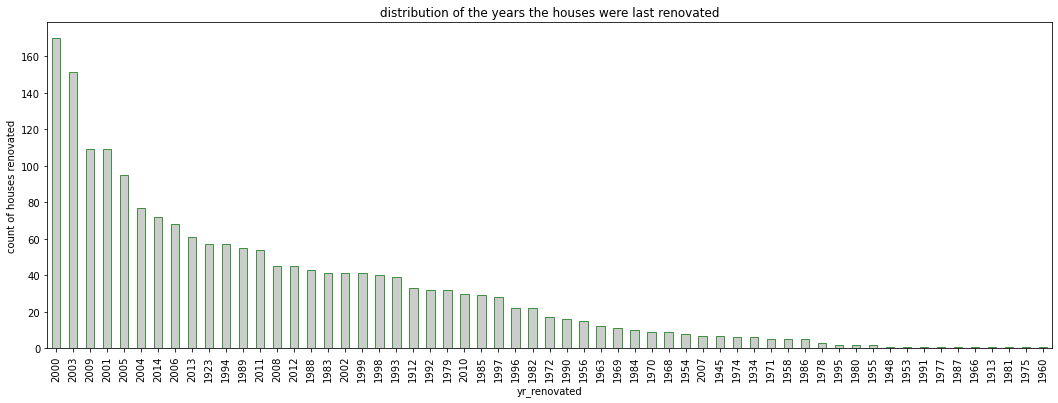

In [50]:
#plotting the chart
fig = plt.figure(figsize=(18,6))
df_maxb_cities_plot= df_renovated_years.plot(kind = 'bar',color='#ccc', edgecolor="#409240", linewidth=1)
df_maxb_cities_plot.set_ylabel('count of houses renovated')
plt.title('distribution of the years the houses were last renovated')
plt.xlabel('yr_renovated')
plt.show()


###### The chart above shows that houses were renovated most in the year 2000

### <span style='color:blue'> Question 7. The distribution of average basement square feets across top 10 cities.</span>

In [51]:
#basement square feet= 0 would be dropped, this is because its not possible for a house not to have sqft_basement measurement
houses_square_feet = df_housing.loc[df_housing['sqft_basement']!=0]
houses_square_feet.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,date_time,new_date,new_month,price_range
1,2014-05-02 00:00:00,2384000.00,5,2,3650,9050,2.00,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014-05-02,2,5,1000000+
3,2014-05-02 00:00:00,420000.00,3,2,2000,8030,1.00,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014-05-02,2,5,400000-600000
4,2014-05-02 00:00:00,550000.00,4,2,1940,10500,1.00,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014-05-02,2,5,400000-600000
8,2014-05-02 00:00:00,452500.00,3,2,2430,88426,1.00,0,0,4,...,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,2014-05-02,2,5,400000-600000
11,2014-05-02 00:00:00,1400000.00,4,2,2920,4000,1.50,0,0,5,...,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA,2014-05-02,2,5,1000000+


In [52]:
#to get mean 
df3 = houses_square_feet.groupby('city')['sqft_basement'].mean()
df4= df3.sort_values(ascending=False)
df_h_sf= df4.head(10)
df_h_sf

city
Clyde Hill      1510.00
Medina          1504.00
Mercer Island   1219.26
Bellevue        1031.06
Carnation       1030.00
Kenmore          955.45
Woodinville      926.44
Snoqualmie       857.78
Normandy Park    845.00
Issaquah         838.13
Name: sqft_basement, dtype: float64

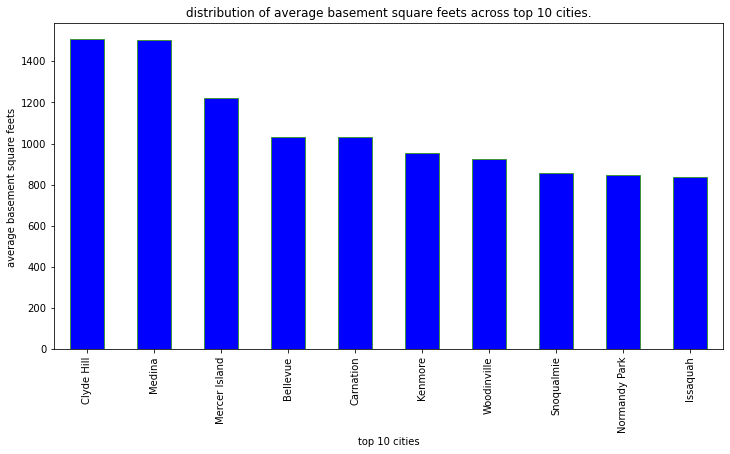

In [53]:
#plotting the chart
fig = plt.figure(figsize=(12,6))
df_h_sf_plot= df_h_sf.plot(kind = 'bar',color="blue", edgecolor="#409240", linewidth=1)
df_h_sf_plot.set_ylabel('average basement square feets ')
plt.title('distribution of average basement square feets across top 10 cities.')
plt.xlabel('top 10 cities')
plt.show()

###### From the Clyde Hill city has the highest average basement square 

### <span style='color:blue'> Question 8. The relationship between prices and number of bedrooms.</span>

In [54]:
#bedroom= 0 would be dropped, this is an outlier
bedrooms_ = df_housing.loc[df_housing['bedrooms']!=0]
bedrooms_.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,date_time,new_date,new_month,price_range
0,2014-05-02 00:00:00,313000.00,3,1,1340,7912,1.50,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014-05-02,2,5,200000-400000
1,2014-05-02 00:00:00,2384000.00,5,2,3650,9050,2.00,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014-05-02,2,5,1000000+
2,2014-05-02 00:00:00,342000.00,3,2,1930,11947,1.00,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014-05-02,2,5,200000-400000
3,2014-05-02 00:00:00,420000.00,3,2,2000,8030,1.00,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014-05-02,2,5,400000-600000
4,2014-05-02 00:00:00,550000.00,4,2,1940,10500,1.00,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014-05-02,2,5,400000-600000


In [55]:
# to get the average price
df5 = bedrooms_.groupby('bedrooms')['price'].mean()
df6= df5.sort_values(ascending=False)
df6

bedrooms
8   1155000.00
7   1049428.57
6    817362.84
5    770185.99
4    635119.36
9    599999.00
3    488613.02
2    391621.92
1    274076.32
Name: price, dtype: float64

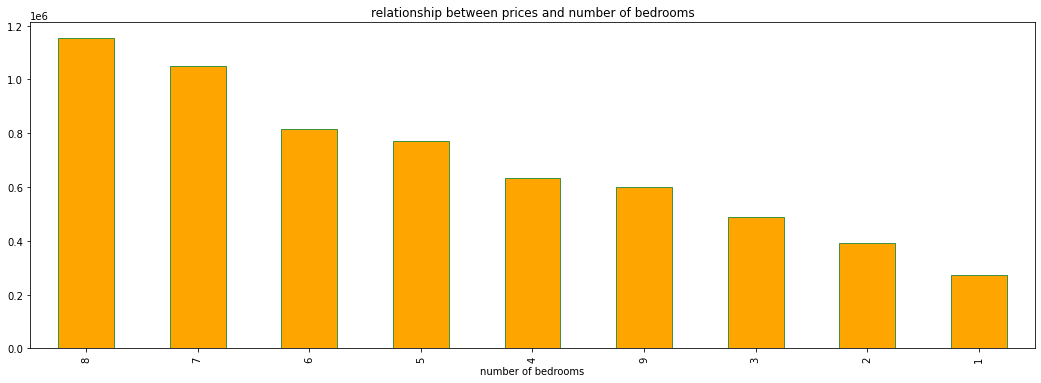

In [56]:
#plotting the chart
fig = plt.figure(figsize=(18,6))
df_b_= df6.plot(kind = 'bar',color="orange", edgecolor="#409240", linewidth=1)
df_h_sf_plot.set_ylabel('average prices')
plt.title('relationship between prices and number of bedrooms')
plt.xlabel('number of bedrooms')
plt.show()

###### The chart above shows that 8 bedrooms has the highest average price

### <span style='color:blue'> Question 9. The relationship between number of bedrooms and year the house was built.</span>

In [57]:
#using pivot to group based on the year and the no of rooms respectively.
bedrooms_years= bedrooms_ [['yr_built','bedrooms']].groupby(['yr_built','bedrooms']).size().reset_index(name='counts')

bedrooms_years_pivot = bedrooms_years.pivot(values="counts",index="yr_built",
                        columns="bedrooms",).sort_values('yr_built')
bedrooms_years_pivot

bedrooms,1,2,3,4,5,6,7,8,9
yr_built,,,,,,,,,
1900,NaN,4.00,10.00,5.00,1.00,2.00,NaN,NaN,NaN
1901,NaN,2.00,4.00,2.00,NaN,NaN,1.00,NaN,NaN
1902,NaN,3.00,NaN,3.00,3.00,1.00,NaN,NaN,NaN
1903,NaN,1.00,6.00,1.00,2.00,NaN,NaN,NaN,NaN
1904,NaN,3.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2010,NaN,2.00,16.00,9.00,1.00,NaN,NaN,NaN,NaN
2011,NaN,5.00,17.00,2.00,NaN,NaN,NaN,NaN,NaN
2012,NaN,2.00,15.00,14.00,1.00,1.00,NaN,NaN,NaN


Text(0, 0.5, 'number of bedrooms')

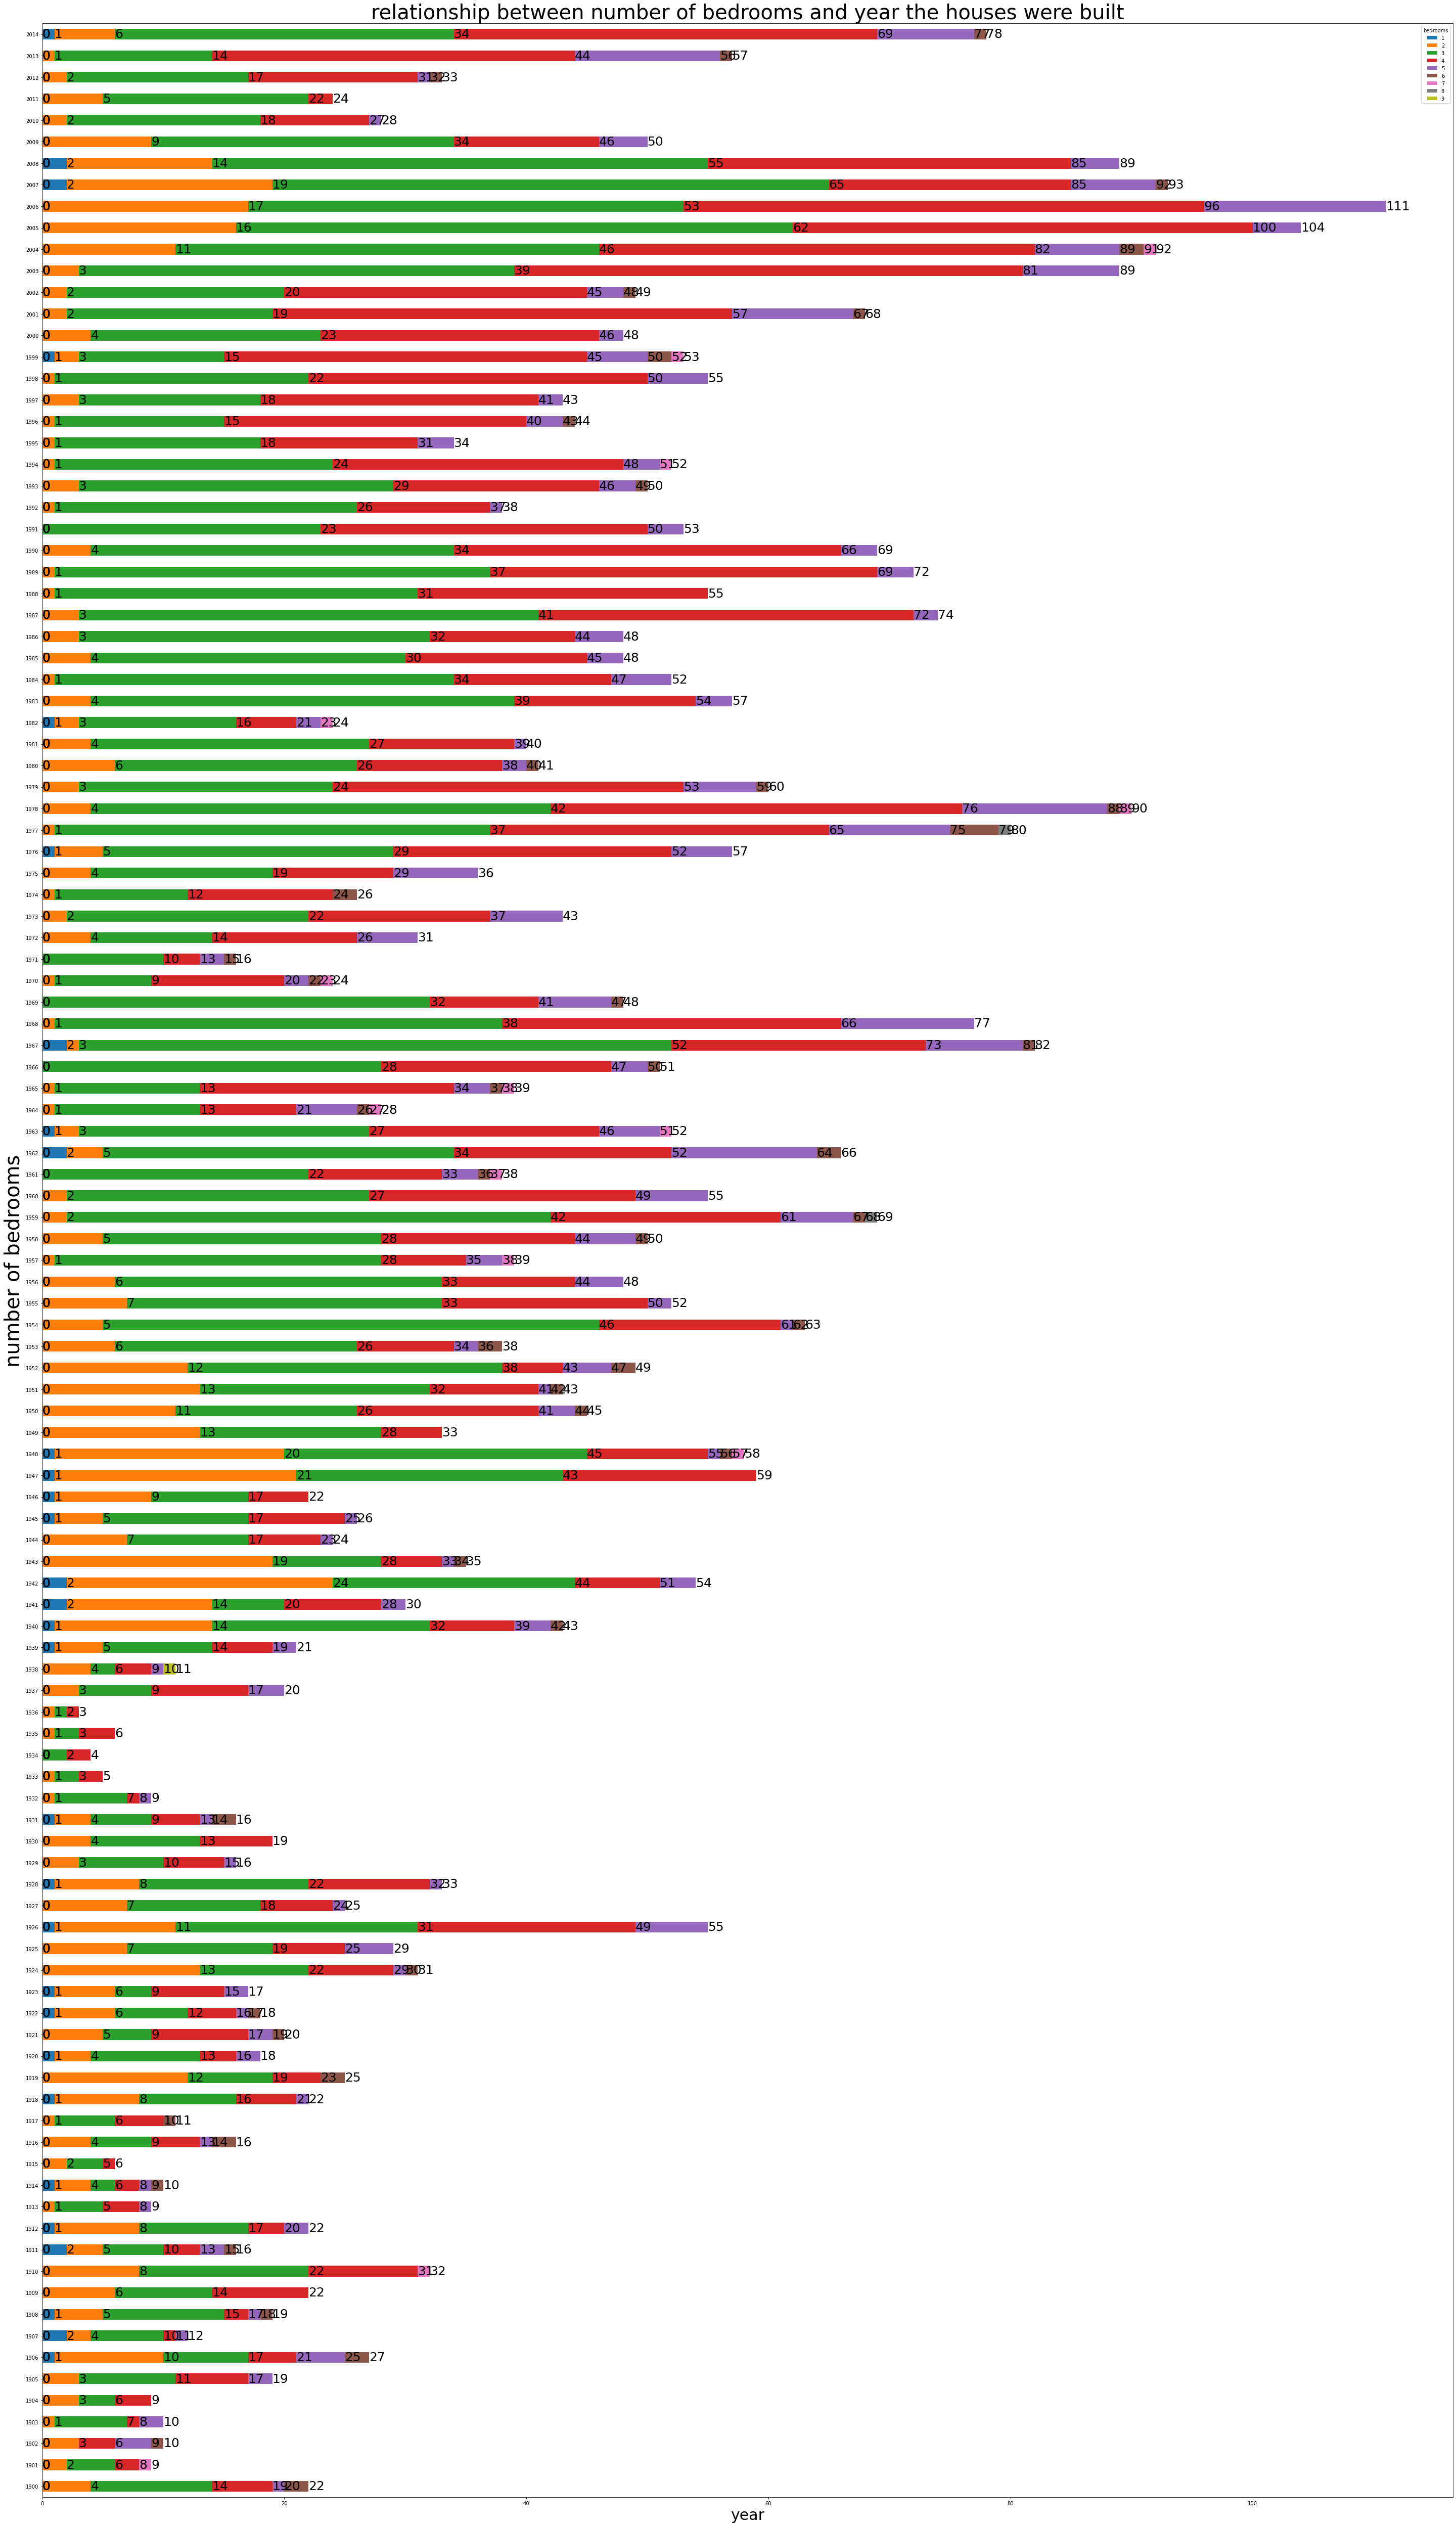

In [61]:
#plotting the chart
plot= bedrooms_years_pivot.plot.barh(stacked=True, figsize = (50,90))
for container in plot.containers:
    plot.bar_label(container,fontsize = 25)
plt.title('relationship between number of bedrooms and year the houses were built',fontsize = 40) 
plt.xlabel("year",fontsize = 30)
plt.ylabel("number of bedrooms",fontsize = 40)

###### From the chart above, it can be seen that highest respective number of bedrooms was built in year 2006